<a href="https://colab.research.google.com/github/cdmafAdi/DL_NOTES-/blob/main/CNN/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt


In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
print(x_train.shape)

(60000, 28, 28)


In [4]:
x_train = x_train/255
x_test = x_test/255

In [5]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1,28,28,1)

In [6]:
x_train.shape

(60000, 28, 28, 1)

In [7]:
model = models.Sequential([

                           layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),


                            layers.MaxPooling2D((2,2)),

                           layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
                           layers.MaxPooling2D((2,2)),

                           layers.Flatten(),
                           layers.Dense(128, activation='relu'),
                           layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [9]:
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.1
)

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 45s 102ms/step - accuracy: 0.8372 - loss: 0.5465 - val_accuracy: 0.9812 - val_loss: 0.0630
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 44s 105ms/step - accuracy: 0.9802 - loss: 0.0643 - val_accuracy: 0.9850 - val_loss: 0.0486
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 43s 101ms/step - accuracy: 0.9866 - loss: 0.0425 - val_accuracy: 0.9900 - val_loss: 0.0379
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 44s 105ms/step - accuracy: 0.9896 - loss: 0.0326 - val_accuracy: 0.9898 - val_loss: 0.0366
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 81s 102ms/step - accuracy: 0.9927 - loss: 0.0229 - val_accuracy: 0.9872 - val_loss: 0.0413
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 81s 101ms/step - accuracy: 0.9933 - loss: 0.0204 - val_accuracy: 0.9917 - val_loss: 0.0317
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 43s 101ms/step - accuracy: 0.9957 - loss: 0.0137 - val_accuracy: 0.9902 - val_loss: 0.0370
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 44s 103ms/step - accuracy: 0.9959 - loss: 0

In [10]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9881 - loss: 0.0404
Test Accuracy: 0.9904000163078308


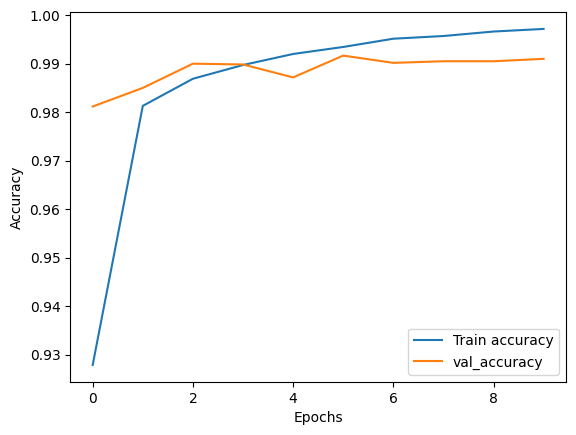

In [11]:
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()